In [48]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
import pickle

from sklearn.model_selection import cross_val_score
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn.ensemble import AdaBoostClassifier

In [3]:
### I. Apprentissage supervisé : Feature engineering et Classification


#1.Chargement des données et préparation

data = pd.read_csv('./credit_scoring.csv', sep=';')
data.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [4]:
X = data.values
status = X[:, [13]] #colonne des status
other = X[:, 0:13] #tout les reste
labels = data.columns #intitulé des colonnes

In [5]:
nbrl = status.shape[0]
unique_elements, counts_elements = np.unique(status, return_counts=True)
pourcentage0 = counts_elements[0]*100/nbrl
pourcentage1 = counts_elements[1]*100/nbrl

print("L'échantillion est de taille : ")
print(other.shape)
print("")
print("Le pourcentage d'examples négatf est de : ")
print(pourcentage0)
print("")
print("Le pourcentage d'examples positif est de : ")
print(pourcentage1)

L'échantillion est de taille : 
(4375, 13)

Le pourcentage d'examples négatf est de : 
27.794285714285714

Le pourcentage d'examples positif est de : 
72.20571428571428


In [6]:
x_train, x_test, y_train, y_test = train_test_split(other, status, train_size = 0.5, random_state = 1)
#Ici on divise les données en 2, une partie d'entrainement et une de test.

In [7]:
#2. Apprentissage et évaluation de modèles

# Ici On test 3 algorithmes differents et on test leurs score de prediction
# de 3 facons differentes (precision,rappel,accuracy) 

# Comment choisir laquelle est la meilleur facon ? Cela depend du probleme. 
# Dans notre cas on veux savoir si on doit donner un credit ou pas a la personne
# qui le demande.
# Dans le cas du "rappel" on pourrais donner un credit a quelqu'un qui pourrais
# ne pas pouvoir le remourser.
# Dans le cas de la "precision" on pourrais ne pas donner un credit a une
# personne qui aurait pu le rembourser.
# Le "rappel" est donc plus "laxiste" mais dans le cas d'une banque on voudrait
# etre sur d'etre remboursé quoi qu'il arrive quitte a perdre quelque client

# Donc dans notre cas la methode qu'on retiendra est la "precision"
# Ce choix depend vraiment du probleme, dans d'autre cas on preferas parfois 
# se tromper mais ne louper aucune cas positif.


In [8]:
# Un arbre CART (random_state=1)

modelcart = DecisionTreeClassifier(random_state = 1)
modelcart.fit(x_train, y_train)
y_pred = modelcart.predict(x_test)
precision = precision_score(y_test, y_pred)
rappel = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Score de precision du cart : ")
print(precision)
print("")
print("Score de rappel du cart : ")
print(rappel)
print("")
print("Score d'accuracy du cart: ")
print(accuracy)

Score de precision du cart : 
0.8194174757281554

Score de rappel du cart : 
0.7992424242424242

Score d'accuracy du cart: 
0.7271480804387569


In [9]:
# k-plus-proches-voisins avec k=5

modelneigh = KNeighborsClassifier(n_neighbors=5)
modelneigh.fit(x_train, y_train)
y_pred = modelneigh.predict(x_test)
precision = precision_score(y_test, y_pred)
rappel = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Score de precision des k plus proches voisins : ")
print(precision)
print("")
print("Score de rappel des k plus proches voisins : ")
print(rappel)
print("")
print("Score d'accuracy des k plus proches voisins : ")
print(accuracy)

Score de precision des k plus proches voisins : 
0.7709713024282561

Score de rappel des k plus proches voisins : 
0.8819444444444444

Score d'accuracy des k plus proches voisins : 
0.7248628884826326


In [10]:
# MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1

modelclassifier = MLPClassifier(hidden_layer_sizes=(40,20), random_state=1)
modelclassifier.fit(x_train, y_train)
y_pred = modelclassifier.predict(x_test)
precision = precision_score(y_test, y_pred)
rappel = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Score de precision du MultilayerPerceptron : ")
print(precision)
print("")
print("Score de rappel du MultilayerPerceptron : ")
print(rappel)
print("")
print("Score d'accuracy du MultilayerPerceptron : ")
print(accuracy)

Score de precision du MultilayerPerceptron : 
0.8513618677042801

Score de rappel du MultilayerPerceptron : 
0.6906565656565656

Score d'accuracy du MultilayerPerceptron : 
0.6887568555758684


In [11]:
#3. Normalisation des variables continues

x_train, x_test, y_train, y_test = train_test_split(other, status, train_size = 0.5, random_state = 1)

# Ici on normalise les données pour obtenir peut etre de meilleur resultats
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
modelcart = DecisionTreeClassifier(random_state = 1)
modelcart.fit(x_train, y_train)
y_pred = modelcart.predict(x_test)
precision = precision_score(y_test, y_pred)
rappel = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Score de precision du cart : ")
print(precision)
print("")
print("Score de rappel du cart : ")
print(rappel)
print("")
print("Score d'accuracy du cart: ")
print(accuracy)
print("")
print("")
print("")
modelneigh = KNeighborsClassifier(n_neighbors=5)
modelneigh.fit(x_train, y_train)
y_pred = modelneigh.predict(x_test)
precision = precision_score(y_test, y_pred)
rappel = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Score de precision des k plus proches voisins : ")
print(precision)
print("")
print("Score de rappel des k plus proches voisins : ")
print(rappel)
print("")
print("Score d'accuracy des k plus proches voisins : ")
print(accuracy)
print("")
print("")
print("")
modelclassifier = MLPClassifier(hidden_layer_sizes=(40,20), random_state=1)
modelclassifier.fit(x_train, y_train)
y_pred = modelclassifier.predict(x_test)
precision = precision_score(y_test, y_pred)
rappel = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Score de precision du MultilayerPerceptron : ")
print(precision)
print("")
print("Score de rappel du MultilayerPerceptron : ")
print(rappel)
print("")
print("Score d'accuracy du MultilayerPerceptron : ")
print(accuracy)

Score de precision du cart : 
0.8181818181818182

Score de rappel du cart : 
0.8011363636363636

Score d'accuracy du cart: 
0.7271480804387569



Score de precision des k plus proches voisins : 
0.8106015485407981

Score de rappel des k plus proches voisins : 
0.8592171717171717

Score d'accuracy des k plus proches voisins : 
0.7527422303473492



Score de precision du MultilayerPerceptron : 
0.8381717109326745

Score de rappel du MultilayerPerceptron : 
0.8566919191919192

Score d'accuracy du MultilayerPerceptron : 
0.776508226691042


In [13]:
# On prend donc le score de precision comme repère
# On remaque qu'en normalisant les données ont trouve globalement de 
# meilleur scores pour tous les algorithmes

In [14]:
#4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales

# Ici on concatene les données normalisé au données sur lesquelles on a 
# appliqué le PCA a 3 dimensions
# puis on test comme les 2 cas precedents.

pca_3 = PCA(n_components=3)

x_train, x_test, y_train, y_test = train_test_split(other, status, train_size = 0.5, random_state = 1)

scalerX_train = scaler.fit_transform(x_train)
scalerX_test = scaler.transform(x_test)

PCA_X_train = pca_3.fit_transform(scalerX_train)
PCA_X_test = pca_3.transform(scalerX_test)

x_train = np.hstack((PCA_X_train, scalerX_train))
x_test = np.hstack((PCA_X_test, scalerX_test))

In [15]:
modelcart = DecisionTreeClassifier(random_state = 1)
modelcart.fit(x_train, y_train)
y_pred = modelcart.predict(x_test)
precision = precision_score(y_test, y_pred)
rappel = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Score de precision du cart : ")
print(precision)
print("")
print("Score de rappel du cart : ")
print(rappel)
print("")
print("Score d'accuracy du cart: ")
print(accuracy)
print("")
print("")
print("")
modelneigh = KNeighborsClassifier(n_neighbors=5)
modelneigh.fit(x_train, y_train)
y_pred = modelneigh.predict(x_test)
precision = precision_score(y_test, y_pred)
rappel = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Score de precision des k plus proches voisins : ")
print(precision)
print("")
print("Score de rappel des k plus proches voisins : ")
print(rappel)
print("")
print("Score d'accuracy des k plus proches voisins : ")
print(accuracy)
print("")
print("")
print("")
modelclassifier = MLPClassifier(hidden_layer_sizes=(40,20), random_state=1)
modelclassifier.fit(x_train, y_train)
y_pred = modelclassifier.predict(x_test)
precision = precision_score(y_test, y_pred)
rappel = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Score de precision du MultilayerPerceptron : ")
print(precision)
print("")
print("Score de rappel du MultilayerPerceptron : ")
print(rappel)
print("")
print("Score d'accuracy du MultilayerPerceptron : ")
print(accuracy)

Score de precision du cart : 
0.8200531208499336

Score de rappel du cart : 
0.7796717171717171

Score d'accuracy du cart: 
0.716636197440585



Score de precision des k plus proches voisins : 
0.8103957471943296

Score de rappel des k plus proches voisins : 
0.8661616161616161

Score d'accuracy des k plus proches voisins : 
0.756398537477148



Score de precision du MultilayerPerceptron : 
0.8282097649186256

Score de rappel du MultilayerPerceptron : 
0.8674242424242424

Score d'accuracy du MultilayerPerceptron : 
0.7737659963436929


In [16]:
# Comme dit precedement on prend la precision dans cette situation

# Pour les données non normalisé le meilleur score de precision est :     
# Score de precision du cart : 0.8194174757281554

# Pour les données normalisé le meilleur score de precision est :
# Score de precision du MultilayerPerceptron : 0.8381717109326745

# Pour les données PCA et normalisé concaténées le meilleur score de precision est :
# Score de precision du MultilayerPerceptron : 0.8282097649186256

# On normalise les données on applique l'algorithme :
# MLPClassifier(hidden_layer_sizes=(40,20), random_state=1)
# pour avoir le meilleur score de precision soit 83.8%.

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


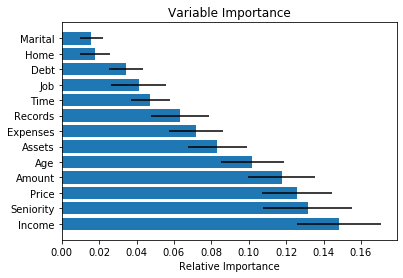

In [17]:
#5. Sélection de variables

# Ici on cherche a savoir quelle sont les variable les plus interessante a 
# prendre en compte pour une meilleur predicition

x_train, x_test, y_train, y_test = train_test_split(other, status, train_size = 0.5, random_state = 1)

Xtrain = scaler.fit_transform(x_train)
Xtest = scaler.transform(x_test)

Ytrain = y_train
Ytest = y_test

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, Ytrain)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = labels
print(features[sorted_idx])
padding = np.arange(Xtrain.size/len(Xtrain)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()


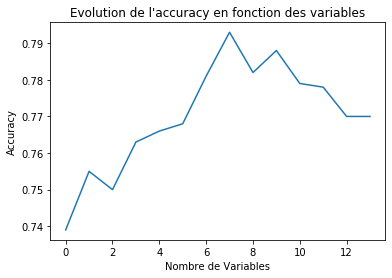

In [18]:
modelclassifier = MLPClassifier(hidden_layer_sizes=(40,20), random_state=1)
scores=np.zeros(Xtrain.shape[1]+1)
for f in np.arange(0, Xtrain.shape[1]+1):
 X1_f = Xtrain[:,sorted_idx[:f+1]]
 X2_f = Xtest [:,sorted_idx[:f+1]]
 modelclassifier.fit(X1_f,Ytrain)
 YKNN=modelclassifier.predict(X2_f)
 scores[f]=np.round(accuracy_score(Ytest,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [19]:
# Il faut prendre 8 variables car le meilleur score prend en compte les variables
# de 0 a 7 dans l'ordre des meilleurs valeurs classé au dessus.

In [31]:
#6. Paramétrage des classifieurs

# On prend les 8 meilleurs variables

otherclass = data[['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses','Records']].values
statusclass = data['Status'].values

x_train, x_test, y_train, y_test = train_test_split(otherclass, statusclass, train_size = 0.5, random_state = 1)

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [32]:
parameter_grid = {
    'hidden_layer_sizes': [(40,20),(40,20,10),(40,20,10,5),(40,20,10,5,1)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
}

clf = GridSearchCV(estimator = modelclassifier , param_grid= parameter_grid)
clf.fit(scaled_x_train,y_train)
clf.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (40, 20)}

In [33]:
# Les meilleurs parametre sont 'activation': 'logistic'
# et 'hidden_layer_sizes': (40, 20) Pour l'algo MLP

In [34]:
#7. Création d’un pipeline

from sklearn.pipeline import Pipeline
import pickle

pipeline = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(activation = 'logistic', hidden_layer_sizes = (40, 20)))])
pipeline.fit(other, status)

print(" Contenu du pipeline : ")
print("")
picklef = pickle.dump(pipeline, open('pickle.pkl', 'wb'))
pi = open('pickle.pkl', 'rb')
print(pickle.load(pi))

 Contenu du pipeline : 

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 MLPClassifier(activation='logistic', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(40, 20),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
                               momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)


In [35]:
P=pickle.load(open('pickle.pkl', 'rb'))
proba = P.predict_proba(other)

print(proba)

# Dans la premiere colonne on predit les 0 et dans la deuxieme les 1.
# C'est le tableau de probabilité du status sur les données brut en utilisant
# les methodes stocké dans le pickle


[[0.41585516 0.58414484]
 [0.08537088 0.91462912]
 [0.66269946 0.33730054]
 [0.18050117 0.81949883]
 [0.15544127 0.84455873]
 [0.02917909 0.97082091]
 [0.03706682 0.96293318]
 [0.04731854 0.95268146]
 [0.18704846 0.81295154]
 [0.79595916 0.20404084]
 [0.19136322 0.80863678]
 [0.05820198 0.94179802]
 [0.17980328 0.82019672]
 [0.03133066 0.96866934]
 [0.81747251 0.18252749]
 [0.22964611 0.77035389]
 [0.03740253 0.96259747]
 [0.0260106  0.9739894 ]
 [0.44449698 0.55550302]
 [0.41849831 0.58150169]
 [0.38729603 0.61270397]
 [0.02343253 0.97656747]
 [0.47171356 0.52828644]
 [0.03337241 0.96662759]
 [0.03890451 0.96109549]
 [0.01969233 0.98030767]
 [0.05603807 0.94396193]
 [0.04102482 0.95897518]
 [0.04878709 0.95121291]
 [0.1728875  0.8271125 ]
 [0.32741008 0.67258992]
 [0.09623575 0.90376425]
 [0.14788577 0.85211423]
 [0.06856016 0.93143984]
 [0.0219762  0.9780238 ]
 [0.01780035 0.98219965]
 [0.08551869 0.91448131]
 [0.53182611 0.46817389]
 [0.02530456 0.97469544]
 [0.37765077 0.62234923]


In [36]:
#8. Comparaison de plusieurs algorithmes d'apprentissage

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier

clfs = {
 'RF': RandomForestClassifier(n_estimators=200, random_state=1),
 'KNN5': KNeighborsClassifier(n_neighbors=5),
 'KNN10': KNeighborsClassifier(n_neighbors=10),
 'KNN100': KNeighborsClassifier(n_neighbors=100),
 'MLP': MLPClassifier(hidden_layer_sizes=(40,20), random_state=1),
 'ADA': AdaBoostClassifier(n_estimators=200),
 'BC': BaggingClassifier(n_estimators=200),
 'DS': SGDClassifier(loss="hinge", max_iter=1),
 'GNB': GaussianNB()    
}


In [37]:
# Ici une version du run_cclassifiers avec le cross_val_score

def run_classifiers_cross_val_score(clfs,X,Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        
        print("Resultats pour l'algorithmes : {0}".format(i))
        print("")
        print("")
        start = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        end = time.time()-start
        print("Temps d'execution pour l'accuracy : ")
        print(end)
        print("")
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("")
        
        start = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf, scoring = 'precision')
        end = time.time()-start
        print("Temps d'execution pour la precision : ")
        print(end)
        print("")
        print("precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("")
        
        start = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf, scoring = 'recall')
        end = time.time()-start
        print("Temps d'execution pour le recall : ")
        print(end)
        print("")
        print("recall for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("")
        print("")
        print("")



In [45]:
# Ici une version du run_cclassifiers avec le cross_validate
# Dans la suite du tp on utiliseras cette fonction sur recommandation du 
# professeur

def run_classifiers(clfs,X,Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        
        print("Resultats pour l'algorithmes : {0}".format(i))
        print("")
        start = time.time()
        cross_valid = cross_validate(clf, X, Y, cv=kf, scoring=['accuracy','recall','precision'])
        end = time.time()-start
        print("Temps d'execution du cross_validate pour {0} : ".format(i))
        print(end)
        print("")
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cross_valid['test_accuracy']), np.std(cross_valid['test_accuracy'])))
        print("precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cross_valid['test_precision']), np.std(cross_valid['test_precision'])))
        print("recall for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cross_valid['test_recall']), np.std(cross_valid['test_recall'])))
        print("")
        print("")
        print("")



In [46]:
#Non normalisé
run_classifiers(clfs,x_train,y_train)

Resultats pour l'algorithmes : RF

Temps d'execution du cross_validate pour RF : 
3.853574514389038

Accuracy for RF is: 0.761 +/- 0.028
precision for RF is: 0.800 +/- 0.037
recall for RF is: 0.892 +/- 0.014



Resultats pour l'algorithmes : KNN5

Temps d'execution du cross_validate pour KNN5 : 
0.1994631290435791

Accuracy for KNN5 is: 0.718 +/- 0.031
precision for KNN5 is: 0.762 +/- 0.035
recall for KNN5 is: 0.885 +/- 0.028



Resultats pour l'algorithmes : KNN10

Temps d'execution du cross_validate pour KNN10 : 
0.19647884368896484

Accuracy for KNN10 is: 0.716 +/- 0.027
precision for KNN10 is: 0.767 +/- 0.031
recall for KNN10 is: 0.871 +/- 0.033



Resultats pour l'algorithmes : KNN100

Temps d'execution du cross_validate pour KNN100 : 
0.2740330696105957

Accuracy for KNN100 is: 0.709 +/- 0.040
precision for KNN100 is: 0.729 +/- 0.037
recall for KNN100 is: 0.947 +/- 0.022



Resultats pour l'algorithmes : MLP

Temps d'execution du cross_validate pour MLP : 
6.0419721603393555

Acc

In [40]:
#normalisé
run_classifiers(clfs,scaled_x_train,y_train)

Resultats pour l'algorithmes : RF

Temps d'execution du cross_validate pour RF : 
3.7574687004089355

Accuracy for RF is: 0.763 +/- 0.028
precision for RF is: 0.801 +/- 0.037
recall for RF is: 0.893 +/- 0.012



Resultats pour l'algorithmes : KNN5

Temps d'execution du cross_validate pour KNN5 : 
0.28027963638305664

Accuracy for KNN5 is: 0.738 +/- 0.026
precision for KNN5 is: 0.789 +/- 0.037
recall for KNN5 is: 0.869 +/- 0.020



Resultats pour l'algorithmes : KNN10

Temps d'execution du cross_validate pour KNN10 : 
0.3146939277648926

Accuracy for KNN10 is: 0.745 +/- 0.034
precision for KNN10 is: 0.806 +/- 0.044
recall for KNN10 is: 0.852 +/- 0.022



Resultats pour l'algorithmes : KNN100

Temps d'execution du cross_validate pour KNN100 : 
0.4891221523284912

Accuracy for KNN100 is: 0.750 +/- 0.032
precision for KNN100 is: 0.766 +/- 0.035
recall for KNN100 is: 0.939 +/- 0.023



Resultats pour l'algorithmes : MLP

Temps d'execution du cross_validate pour MLP : 
9.565013647079468

Acc

In [41]:
# Pour les meme raisons que d'habitude on se concentre sur le score
# de precision

# Pour les données non normalisé le meilleur score de precision est :     
# precision for ADA is: 0.810 +/- 0.040
# Pour les données normalisé le meilleur score de precision est :
# precision for MLP is: 0.814 +/- 0.034

# On normalise les données on applique l'algorithme :
# MLPClassifier(hidden_layer_sizes=(40,20), random_state=1),
# pour avoir le meilleur score de precision soit 81.4%.

In [65]:
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [66]:
### II. Apprentissage supervisé : Données hétérogènes

# 1. 

creditdata = pd.read_csv('./credit.data', sep='\s+',names = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"] )
creditdata.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [67]:
X = creditdata.values
status = X[:, [15]]
other = X[:, 0:15]
labels = creditdata.columns

In [68]:
# On recupere les données numerique et on adatpe les valeurs de notre tableau

other_num = creditdata[["1","2","7","10","13","14","15"]]
other_num.replace("+",1,inplace = True)
other_num.replace("-",0,inplace = True)
other_num.replace("?",np.NaN,inplace = True)
other_num_NaN_float = other_num.astype(float)
other_num_float = other_num_NaN_float[~np.isnan(other_num_NaN_float).any(axis=1)]
status_data = other_num_float["15"]
other_num_float = other_num_float.drop(columns=["15"])
other_num_float


,1,2,7,10,13,14
0,30.83,0.000,1.250,1.0,202.0,0.0
1,58.67,4.460,3.040,6.0,43.0,560.0
2,24.50,0.500,1.500,0.0,280.0,824.0
3,27.83,1.540,3.750,5.0,100.0,3.0
4,20.17,5.625,1.710,0.0,120.0,0.0
5,32.08,4.000,2.500,0.0,360.0,0.0
6,33.17,1.040,6.500,0.0,164.0,31285.0
7,22.92,11.585,0.040,0.0,80.0,1349.0
8,54.42,0.500,3.960,0.0,180.0,314.0
9,42.50,4.915,3.165,0.0,52.0,1442.0


Les dimension du nouveau tableau sont : 
(666, 6)
La repartition des exemples positif et negatif : 


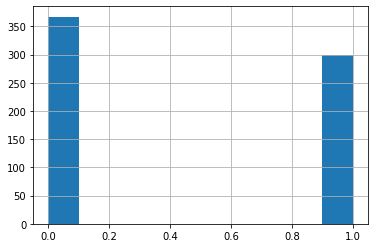

In [69]:
print("Les dimension du nouveau tableau sont : ")
print(other_num_float.shape)
print("La repartition des exemples positif et negatif : ")
status_data.hist()

In [70]:
x_train, x_test, y_train, y_test = train_test_split(other_num_float, status_data, train_size = 0.5, random_state = 1)

#Non normalisé
run_classifiers(clfs,x_train,y_train)

Resultats pour l'algorithmes : RF

Temps d'execution du cross_validate pour RF : 
1.5093941688537598

Accuracy for RF is: 0.760 +/- 0.051
precision for RF is: 0.769 +/- 0.099
recall for RF is: 0.714 +/- 0.079



Resultats pour l'algorithmes : KNN5

Temps d'execution du cross_validate pour KNN5 : 
0.07810711860656738

Accuracy for KNN5 is: 0.649 +/- 0.093
precision for KNN5 is: 0.645 +/- 0.102
recall for KNN5 is: 0.546 +/- 0.125



Resultats pour l'algorithmes : KNN10

Temps d'execution du cross_validate pour KNN10 : 
0.0781092643737793

Accuracy for KNN10 is: 0.643 +/- 0.082
precision for KNN10 is: 0.673 +/- 0.094
recall for KNN10 is: 0.476 +/- 0.111



Resultats pour l'algorithmes : KNN100

Temps d'execution du cross_validate pour KNN100 : 
0.09803652763366699

Accuracy for KNN100 is: 0.655 +/- 0.081
precision for KNN100 is: 0.896 +/- 0.159
recall for KNN100 is: 0.307 +/- 0.094



Resultats pour l'algorithmes : MLP

Temps d'execution du cross_validate pour MLP : 
0.3379497528076172

A

In [71]:
#Normalisé

sclaled_x_train = scaler.fit_transform(x_train)
sclaled_x_test = scaler.transform(x_test)

run_classifiers(clfs,sclaled_x_train,y_train)

Resultats pour l'algorithmes : RF

Temps d'execution du cross_validate pour RF : 
1.5290172100067139

Accuracy for RF is: 0.760 +/- 0.051
precision for RF is: 0.769 +/- 0.099
recall for RF is: 0.714 +/- 0.079



Resultats pour l'algorithmes : KNN5

Temps d'execution du cross_validate pour KNN5 : 
0.06283259391784668

Accuracy for KNN5 is: 0.706 +/- 0.061
precision for KNN5 is: 0.758 +/- 0.134
recall for KNN5 is: 0.561 +/- 0.075



Resultats pour l'algorithmes : KNN10

Temps d'execution du cross_validate pour KNN10 : 
0.060837507247924805

Accuracy for KNN10 is: 0.742 +/- 0.081
precision for KNN10 is: 0.888 +/- 0.067
recall for KNN10 is: 0.528 +/- 0.105



Resultats pour l'algorithmes : KNN100

Temps d'execution du cross_validate pour KNN100 : 
0.07380461692810059

Accuracy for KNN100 is: 0.679 +/- 0.092
precision for KNN100 is: 0.939 +/- 0.077
recall for KNN100 is: 0.342 +/- 0.092



Resultats pour l'algorithmes : MLP

Temps d'execution du cross_validate pour MLP : 
1.8866372108459473


In [72]:
# Pour les meme raisons que dans la partie 1 on se concentre sur le score
# de precision

# Pour les données non normalisé le meilleur score de precision est :     
# precision for KNN100 is: 0.896 +/- 0.159
# Pour les données normalisé le meilleur score de precision est :
# precision for KNN100 is: 0.939 +/- 0.077
# On normalise les données on applique l'algorithme :
# KNeighborsClassifier(n_neighbors=100), avec 100 voisins pour avoir le meilleur
# score de precision soit 93.9%.


In [73]:
# 1. 

# Ici on recupere les données categorielles en atribuant la valeur la plus 
# frequente au données manquantes

col_cat = ["0","3","4","5","6","8","9","11","12"]

X_cat = np.copy(creditdata[col_cat])
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [74]:
# Ici on recupere les données numerique en atribuant la valeur moyenne 
# au données manquantes

col_num = ["1","2","7","10","13","14"]

X_num = np.copy(creditdata[col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

In [75]:
# on encode les données categorielles pour qu'elle ne soit plus des strings
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

In [76]:
# On concatene les 2 tableau de données (categorielles et numeriques)
datafinal = np.hstack((X_cat_bin, X_num))

In [77]:
# On encode les colonnes des status
status_enc = preprocessing.LabelEncoder().fit_transform(status)

In [78]:
#Non normalisé

run_classifiers(clfs,datafinal,status_enc)

Resultats pour l'algorithmes : RF

Temps d'execution du cross_validate pour RF : 
1.8675527572631836

Accuracy for RF is: 0.878 +/- 0.036
precision for RF is: 0.901 +/- 0.053
recall for RF is: 0.881 +/- 0.047



Resultats pour l'algorithmes : KNN5

Temps d'execution du cross_validate pour KNN5 : 
0.09723329544067383

Accuracy for KNN5 is: 0.695 +/- 0.053
precision for KNN5 is: 0.697 +/- 0.056
recall for KNN5 is: 0.798 +/- 0.066



Resultats pour l'algorithmes : KNN10

Temps d'execution du cross_validate pour KNN10 : 
0.07561421394348145

Accuracy for KNN10 is: 0.664 +/- 0.053
precision for KNN10 is: 0.684 +/- 0.054
recall for KNN10 is: 0.734 +/- 0.091



Resultats pour l'algorithmes : KNN100

Temps d'execution du cross_validate pour KNN100 : 
0.14693999290466309

Accuracy for KNN100 is: 0.685 +/- 0.044
precision for KNN100 is: 0.663 +/- 0.041
recall for KNN100 is: 0.883 +/- 0.064



Resultats pour l'algorithmes : MLP

Temps d'execution du cross_validate pour MLP : 
1.360229253768921

A

In [81]:
#Normalisé

sclaled_datafinal = scaler.fit_transform(datafinal)
run_classifiers(clfs,sclaled_datafinal,status_enc)

Resultats pour l'algorithmes : RF

Temps d'execution du cross_validate pour RF : 
1.831895112991333

Accuracy for RF is: 0.878 +/- 0.036
precision for RF is: 0.901 +/- 0.053
recall for RF is: 0.881 +/- 0.047



Resultats pour l'algorithmes : KNN5

Temps d'execution du cross_validate pour KNN5 : 
0.1405942440032959

Accuracy for KNN5 is: 0.823 +/- 0.035
precision for KNN5 is: 0.822 +/- 0.043
recall for KNN5 is: 0.873 +/- 0.037



Resultats pour l'algorithmes : KNN10

Temps d'execution du cross_validate pour KNN10 : 
0.14893198013305664

Accuracy for KNN10 is: 0.820 +/- 0.041
precision for KNN10 is: 0.825 +/- 0.042
recall for KNN10 is: 0.861 +/- 0.044



Resultats pour l'algorithmes : KNN100

Temps d'execution du cross_validate pour KNN100 : 
0.19556879997253418

Accuracy for KNN100 is: 0.850 +/- 0.049
precision for KNN100 is: 0.833 +/- 0.049
recall for KNN100 is: 0.920 +/- 0.052



Resultats pour l'algorithmes : MLP

Temps d'execution du cross_validate pour MLP : 
3.9428446292877197

Ac

In [80]:
# En prenant en compte toutes les données (categorielles et numerique)
# En se basant toujours sur le score de precision
# On obtient un score max pour les données non normalisé de : 
# precision for RF is: 0.901 +/- 0.053
# On obtient un score max pour les données normalisé de : 
# precision for RF is: 0.901 +/- 0.053

# On ne normalise pas les données on applique l'algorithme :
# RandomForestClassifier(n_estimators=200, random_state=1)
# pour avoir le meilleur le score de precision soit 90.1%.
